# Importing the dataset into a dataframe

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk


In [2]:
# !pip install pyarabic
# !pip install langdetect
# !pip install nltk

# from langdetect import detect
# import pyarabic.araby as araby
# nltk.download("all")


In [3]:
df = pd.read_csv('freqEncoded.csv')
df.drop(["text","stemmed_text","normalized","clean_text"],axis=1,inplace=True)

In [4]:
df.head()

,label,freq
0,1,"{'متز': 1, 'نوع': 1, 'ما': 1, 'نظف': 1, 'وقع':..."
1,1,"{'احد': 1, 'سبب': 1, 'نجح': 1, 'امر': 2, 'كل':..."
2,1,"{'هدف': 1, 'نقل': 1, 'صخب': 1, 'شرع': 1, 'قهر'..."
3,1,"{'خلص': 3, 'بدء': 1, 'الل': 1, 'بهر': 1, 'زي':..."
4,1,"{'ياس': 1, 'جزء': 2, 'لا': 2, 'دبي': 1, 'ندق':..."


# Unique Dictionary

In [5]:


def get_unique(df,colname):
  sentences_arr=df[colname].to_numpy() #convert df to np array
  words=' '.join(sentences_arr).split(' ') # join all strings into one string then splitting to get the words
  words=np.array(words) #convert to np array
  unique,counts = np.unique(words,return_counts=True)
  return unique, counts

def get_unique_dict(unique,counts):
  unique_dict=dict(zip(unique,counts))
  unique_dict=dict(sorted(unique_dict.items(), key=lambda item: item[1],reverse=True))
  return unique_dict
def remove_redundant_words(unique_dict):
  stop_words=['من','على','عن','في','فى','و','ان','هذا','او','كتب','...','.','','الى','فيه','انه','قبل','//','..','،',':',"؟",'/']
  for k, v in list(unique_dict.items()):
      if(unique_dict[k]<100 or k in stop_words):
        del unique_dict[k]

  return unique_dict



In [6]:
df_copy= pd.read_csv('freqEncoded.csv')
unique,counts=get_unique(df_copy,"normalized")
unique_dict=get_unique_dict(unique,counts)
unique_dict=remove_redundant_words(unique_dict)

In [7]:
unique_dict

{'لا': 46481,
 'روي': 39737,
 'ما': 35527,
 'جدا': 33678,
 'كان': 31659,
 'قرء': 30133,
 'كثر': 29226,
 'لم': 28285,
 'ندق': 28261,
 'عمل': 24589,
 'وجد': 24462,
 'كل': 24394,
 'غرف': 22749,
 'حدث': 21929,
 'وقع': 21515,
 'بعد': 20845,
 'غير': 20823,
 'علم': 20637,
 'جمل': 20497,
 'لكن': 20115,
 'التي': 19829,
 'نفس': 18656,
 'مع': 18473,
 'فكر': 18459,
 'الل': 18121,
 'شخص': 17767,
 'هو': 17455,
 'جمع': 17291,
 'بعض': 15945,
 'جيد': 15644,
 'خدم': 15180,
 'نظف': 14401,
 'كانت': 14269,
 'شكل': 14102,
 'عرف': 14049,
 'هذه': 13567,
 'بين': 13480,
 'شعر': 13331,
 'عند': 13288,
 'وحد': 13262,
 'الذي': 13228,
 'كلم': 13176,
 'ولا': 13069,
 'عجب': 12606,
 'قرب': 12439,
 'اخر': 12411,
 'الا': 12117,
 'حتى': 11898,
 'رءع': 11889,
 'قدم': 11874,
 'نظر': 11553,
 'علي': 11458,
 'نهي': 11402,
 'دخل': 11274,
 'سلم': 11237,
 'شيء': 11135,
 'سلب': 10727,
 'طرق': 10454,
 'ليس': 10309,
 'اول': 10136,
 'فصل': 10062,
 'سيء': 9866,
 'وقف': 9742,
 'عبر': 9653,
 'ذكر': 9345,
 'خلف': 9244,
 'ذلك': 9195,
 'حق

# More preprocessing

### Convert string dict to actual dict

In [8]:
import ast

#converting string dict to dict
df['freq']=df['freq'].apply(lambda x: ast.literal_eval(x))
print(type(df.head()["freq"][0]))

<class 'dict'>


### Add colum for each words whose value is the frequency of appearance in the sentence

In [9]:
def encode_freq(freq_dict):
    words=freq_dict.keys()
    arr= [freq_dict[word] if word in words else 0 for word in unique_dict.keys() ] 
    return np.array(arr)

In [ ]:
freq_columns=df['freq'].apply(encode_freq)
# dfOut=pd.DataFrame()
# dfOut['label']=df['label'] #copy labels
df[list(unique_dict.keys())]=pd.DataFrame(freq_columns.tolist()) #convert list of frequencies to columns

In [12]:
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 3683 entries, label to يمض
dtypes: int32(3681), int64(1), object(1)
memory usage: 1.4+ GB
None


,label,freq,لا,روي,ما,جدا,كان,قرء,كثر,لم,...,سلو,فتل,فقم,قمن,كيلو,مل،,هدل,هرد,وذك,يمض
0,1,"{'متز': 1, 'نوع': 1, 'ما': 1, 'نظف': 1, 'وقع':...",0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,"{'احد': 1, 'سبب': 1, 'نجح': 1, 'امر': 2, 'كل':...",1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,"{'هدف': 1, 'نقل': 1, 'صخب': 1, 'شرع': 1, 'قهر'...",0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,"{'خلص': 3, 'بدء': 1, 'الل': 1, 'بهر': 1, 'زي':...",1,2,2,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,"{'ياس': 1, 'جزء': 2, 'لا': 2, 'دبي': 1, 'ندق':...",2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,-1,"{'عرفش': 1, 'ليه': 1, 'كنت': 1, 'كمل': 1, 'وهي...",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99995,-1,"{'لا': 3, 'سحق': 1, 'يكون': 1, 'كنق': 1, 'لنه'...",3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,-1,"{'ضعف': 1, 'جدا': 1, 'ولم': 1, 'متع': 1, 'به':...",0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,-1,"{'ملة': 1, 'جدا': 1, 'حمد': 1, 'حسن': 1, 'علو'...",0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df.to_csv('freqEncoded.csv', encoding = 'utf-8-sig',index=False) 

In [14]:
data =df.copy()

In [15]:

#import seaborn as sns
import sklearn.metrics as metrics
import sklearn.model_selection as ms
import sklearn.preprocessing as preprocess

In [19]:
data=data.drop(columns=["freq"])

In [20]:
df_remLabel=data.drop(columns=["label"])
df_label=data["label"]
x_train, x_test, y_train, y_test = ms.train_test_split(df_remLabel,df_label, test_size=0.2, random_state=42)

In [21]:
from sklearn.tree import DecisionTreeClassifier
DT_clf = DecisionTreeClassifier(random_state=0).fit(x_train, y_train)


c:\users\auc\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


NameError: name 'x_test_fit' is not defined

In [22]:
DT_pred = DT_clf.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, DT_pred))

c:\users\auc\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


              precision    recall  f1-score   support

          -1       0.56      0.57      0.56      6603
           0       0.47      0.47      0.47      6722
           1       0.58      0.57      0.57      6675

    accuracy                           0.53     20000
   macro avg       0.54      0.53      0.53     20000
weighted avg       0.53      0.53      0.53     20000



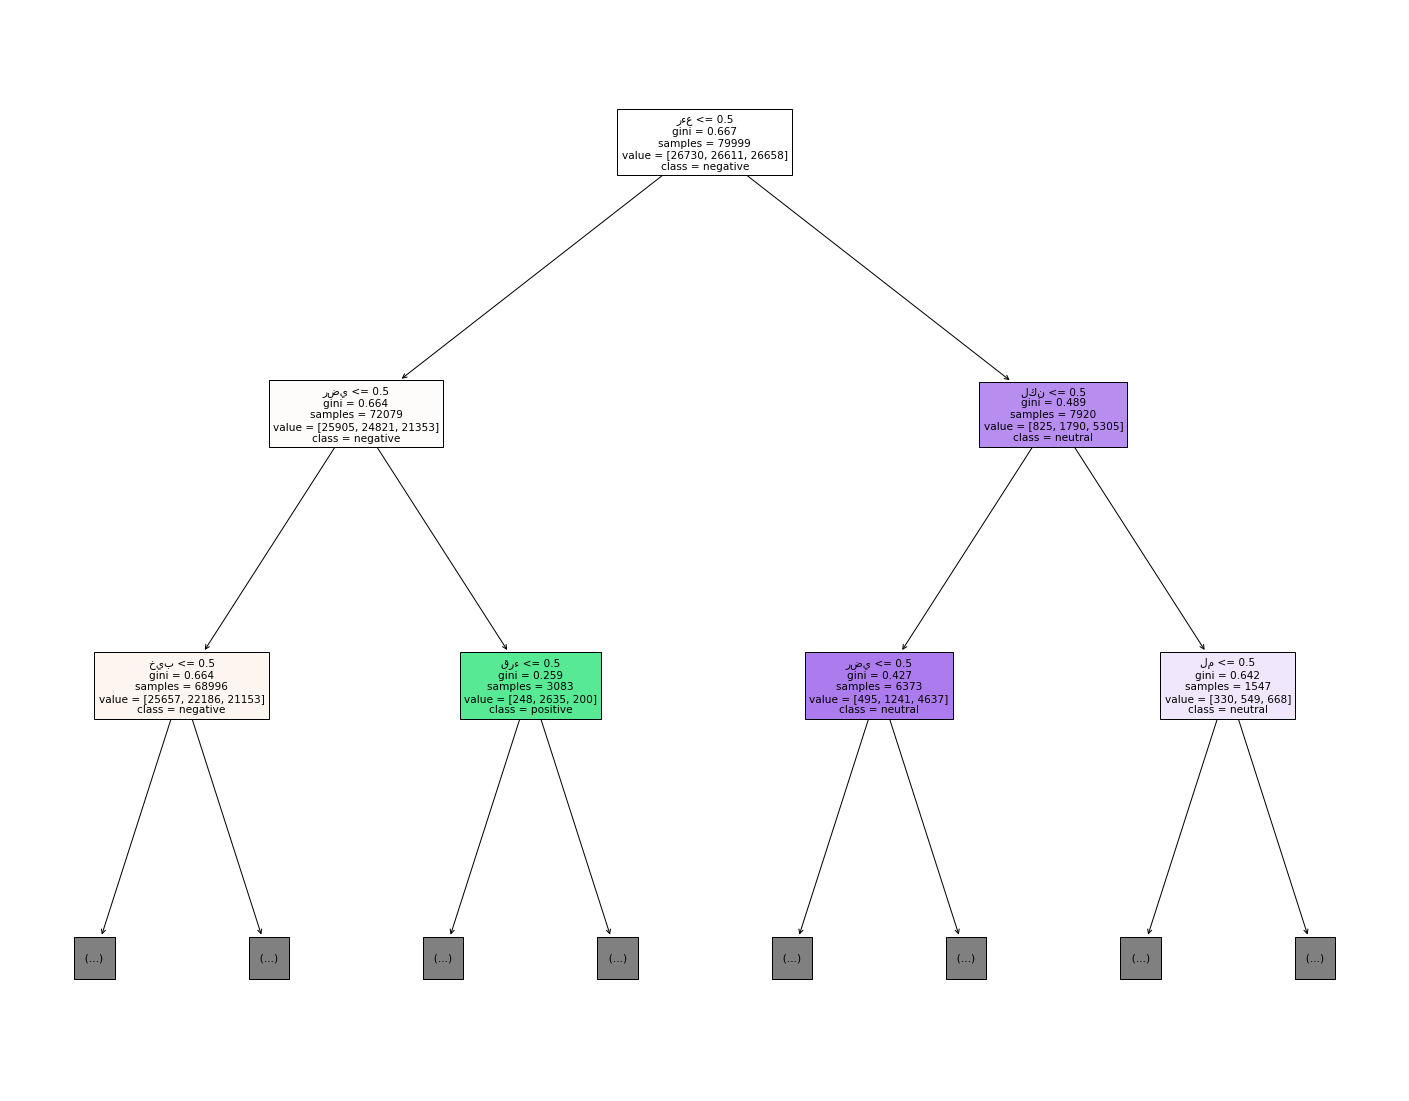

In [23]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(25,20))
plot_tree(DT_clf, max_depth=2, feature_names=x_test.columns, class_names=["negative", "positive", "neutral"], filled=True);

In [24]:
from sklearn.naive_bayes import GaussianNB
NV_clf = GaussianNB().fit(x_train, y_train)
NV_pred = NV_clf.predict(x_test)
print(classification_report(y_test, NV_pred))

c:\users\auc\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
c:\users\auc\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


              precision    recall  f1-score   support

          -1       0.41      0.76      0.53      6603
           0       0.41      0.20      0.27      6722
           1       0.57      0.37      0.45      6675

    accuracy                           0.44     20000
   macro avg       0.46      0.45      0.42     20000
weighted avg       0.46      0.44      0.42     20000



In [25]:
from sklearn.neural_network import MLPClassifier
NN_clf_stop = MLPClassifier(random_state=1, max_iter=30, hidden_layer_sizes=(16,16), tol=1e-5, early_stopping=True, learning_rate_init=0.01)
NN_clf_stop.fit(x_train, y_train)
NN_pred_stop = NN_clf_stop.predict(x_test)
print(classification_report(y_test, NN_pred_stop))

c:\users\auc\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
c:\users\auc\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


              precision    recall  f1-score   support

          -1       0.71      0.65      0.68      6603
           0       0.54      0.57      0.55      6722
           1       0.68      0.70      0.69      6675

    accuracy                           0.64     20000
   macro avg       0.64      0.64      0.64     20000
weighted avg       0.64      0.64      0.64     20000



In [26]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
SGD_SVM_clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=500, tol=1e-3))
SGD_SVM_clf.fit(x_train, y_train)
SGD_SVM_pred = SGD_SVM_clf.predict(x_test)
print(classification_report(y_test, SGD_SVM_pred))

c:\users\auc\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
c:\users\auc\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
c:\users\auc\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


              precision    recall  f1-score   support

          -1       0.63      0.69      0.66      6603
           0       0.54      0.45      0.49      6722
           1       0.64      0.69      0.66      6675

    accuracy                           0.61     20000
   macro avg       0.60      0.61      0.60     20000
weighted avg       0.60      0.61      0.60     20000



In [27]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
#Logreg = LogisticRegression(max_iter=500, solver = 'newton-cg', n_jobs=8).fit(x_train_fit,y_train)
Logreg = LogisticRegression(random_state=0, max_iter=500).fit(x_train,y_train)
Logreg_pred = Logreg.predict(x_test)

print(classification_report(y_test, Logreg_pred))

c:\users\auc\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
c:\users\auc\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


              precision    recall  f1-score   support

          -1       0.68      0.68      0.68      6603
           0       0.54      0.53      0.54      6722
           1       0.67      0.69      0.68      6675

    accuracy                           0.63     20000
   macro avg       0.63      0.63      0.63     20000
weighted avg       0.63      0.63      0.63     20000



# Data Splitting

In [22]:
X=df.iloc[:,2:]
Y=df["label"]

0        1
1        1
2        1
3        1
4        1
        ..
99994   -1
99995   -1
99996   -1
99997   -1
99998   -1
Name: label, Length: 99999, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

print(x_train.shape,y_train.shape)

(74999, 3681) (74999,)


# Logistic Regrsession


In [24]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()


In [25]:
logisticRegr.fit(x_train, y_train)


/home/youssef/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/home/youssef/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()